In [43]:
# Imports
import pandas as pd
import numpy as np

from nba_api.stats.static import players
from nba_api.stats.static import teams 

import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk

pd.set_option('display.max_columns',250)

In [44]:
# Creating a DataFrame with all NBA players
player_dict = players.get_players()
players = pd.DataFrame(player_dict)
print("Total of players:",players.shape[0])
players.head()

Total of players: 4831


,id,full_name,first_name,last_name,is_active
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False
1,76002,Zaid Abdul-Aziz,Zaid,Abdul-Aziz,False
2,76003,Kareem Abdul-Jabbar,Kareem,Abdul-Jabbar,False
3,51,Mahmoud Abdul-Rauf,Mahmoud,Abdul-Rauf,False
4,1505,Tariq Abdul-Wahad,Tariq,Abdul-Wahad,False


In [45]:
# Finding LeBron James
lebronId = players.id[players.full_name == 'LeBron James'].to_list()[0]
display(players[players.full_name == 'LeBron James'])

,id,full_name,first_name,last_name,is_active
2083,2544,LeBron James,LeBron,James,True


In [46]:
# Finding LeBron James
mjid = players.id[players.full_name == 'Michael Jordan'].to_list()[0]
display(players[players.full_name == 'Michael Jordan'])

,id,full_name,first_name,last_name,is_active
2261,893,Michael Jordan,Michael,Jordan,False


In [47]:
# Fetching All LeBron Stats
from nba_api.stats.endpoints import playercareerstats
lebronCareer = playercareerstats.PlayerCareerStats(player_id = lebronId)
lebronCareer = lebronCareer.get_data_frames()[0]
lebronCareer

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,2544,2003-04,00,1610612739,CLE,19.0,79,79,3120.0,622,1492,0.417,63,217,0.290,347,460,0.754,99,333,432,465,130,58,273,149,1654
1,2544,2004-05,00,1610612739,CLE,20.0,80,80,3388.0,795,1684,0.472,108,308,0.351,477,636,0.750,111,477,588,577,177,52,262,146,2175
2,2544,2005-06,00,1610612739,CLE,21.0,79,79,3361.0,875,1823,0.480,127,379,0.335,601,814,0.738,75,481,556,521,123,66,260,181,2478
3,2544,2006-07,00,1610612739,CLE,22.0,78,78,3190.0,772,1621,0.476,99,310,0.319,489,701,0.698,83,443,526,470,125,55,250,171,2132
4,2544,2007-08,00,1610612739,CLE,23.0,75,74,3027.0,794,1642,0.484,113,359,0.315,549,771,0.712,133,459,592,539,138,81,255,165,2250
5,2544,2008-09,00,1610612739,CLE,24.0,81,81,3054.0,789,1613,0.489,132,384,0.344,594,762,0.780,106,507,613,587,137,93,241,139,2304
6,2544,2009-10,00,1610612739,CLE,25.0,76,76,2966.0,768,1528,0.503,129,387,0.333,593,773,0.767,71,483,554,651,125,77,261,119,2258
7,2544,2010-11,00,1610612748,MIA,26.0,79,79,3063.0,758,1485,0.510,92,279,0.330,503,663,0.759,80,510,590,554,124,50,284,163,2111
8,2544,2011-12,00,1610612748,MIA,27.0,62,62,2326.0,621,1169,0.531,54,149,0.362,387,502,0.771,94,398,492,387,115,50,213,96,1683
9,2544,2012-13,00,1610612748,MIA,28.0,76,76,2877.0,765,1354,0.565,103,254,0.406,403,535,0.753,97,513,610,551,129,67,226,110,2036


In [48]:
# Fetching All LeBron Stats
from nba_api.stats.endpoints import playercareerstats
mjcareer = playercareerstats.PlayerCareerStats(player_id = mjid)
mjcareer = mjcareer.get_data_frames()[0]
mjcareer

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,893,1984-85,00,1610612741,CHI,22.0,82,82,3144.0,837,1625,0.515,9,52,0.173,630,746,0.845,167,367,534,481,196,69,291,285,2313
1,893,1985-86,00,1610612741,CHI,23.0,18,7,451.0,150,328,0.457,3,18,0.167,105,125,0.840,23,41,64,53,37,21,45,46,408
2,893,1986-87,00,1610612741,CHI,24.0,82,82,3281.0,1098,2279,0.482,12,66,0.182,833,972,0.857,166,264,430,377,236,125,272,237,3041
3,893,1987-88,00,1610612741,CHI,25.0,82,82,3311.0,1069,1998,0.535,7,53,0.132,723,860,0.841,139,310,449,485,259,131,252,270,2868
4,893,1988-89,00,1610612741,CHI,26.0,81,81,3255.0,966,1795,0.538,27,98,0.276,674,793,0.850,149,503,652,650,234,65,290,247,2633
5,893,1989-90,00,1610612741,CHI,27.0,82,82,3197.0,1034,1964,0.526,92,245,0.376,593,699,0.848,143,422,565,519,227,54,247,241,2753
6,893,1990-91,00,1610612741,CHI,28.0,82,82,3034.0,990,1837,0.539,29,93,0.312,571,671,0.851,118,374,492,453,223,83,202,229,2580
7,893,1991-92,00,1610612741,CHI,29.0,80,80,3102.0,943,1818,0.519,27,100,0.270,491,590,0.832,91,420,511,489,182,75,200,201,2404
8,893,1992-93,00,1610612741,CHI,30.0,78,78,3067.0,992,2003,0.495,81,230,0.352,476,569,0.837,135,387,522,428,221,61,207,188,2541
9,893,1994-95,00,1610612741,CHI,32.0,17,17,668.0,166,404,0.411,16,32,0.500,109,136,0.801,25,92,117,90,30,13,35,47,457


In [49]:
#Creating a column with a cumulative sum on PTS
lebronCareer['SUM_PTS'] = lebronCareer['PTS'].cumsum()

In [50]:
#Creating a column with a cumulative sum on PTS
mjcareer['SUM_PTS'] = mjcareer['PTS'].cumsum()

In [51]:
lebronCareer.tail()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,SUM_PTS
15,2544,2018-19,00,1610612747,LAL,34.0,55,55,1937.0,558,1095,0.510,111,327,0.339,278,418,0.665,57,408,465,454,72,33,197,94,1505,32543
16,2544,2019-20,00,1610612747,LAL,35.0,67,67,2316.0,643,1303,0.493,148,425,0.348,264,381,0.693,66,459,525,684,78,36,261,118,1698,34241
17,2544,2020-21,00,1610612747,LAL,36.0,45,45,1504.0,422,823,0.513,104,285,0.365,178,255,0.698,29,317,346,350,48,25,168,70,1126,35367
18,2544,2021-22,00,1610612747,LAL,37.0,56,56,2084.0,640,1221,0.524,161,448,0.359,254,336,0.756,63,396,459,349,73,59,196,121,1695,37062
19,2544,2022-23,00,1610612747,LAL,38.0,44,44,1603.0,510,1004,0.508,97,308,0.315,211,276,0.764,51,322,373,309,43,24,138,72,1328,38390


In [52]:
mjcareer.tail()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,SUM_PTS
10,893,1995-96,00,1610612741,CHI,33.0,82,82,3090.0,916,1850,0.495,111,260,0.427,548,657,0.834,148,395,543,352,180,42,197,195,2491,24489
11,893,1996-97,00,1610612741,CHI,34.0,82,82,3109.0,920,1892,0.486,111,297,0.374,480,576,0.833,113,369,482,352,140,44,166,156,2431,26920
12,893,1997-98,00,1610612741,CHI,35.0,82,82,3181.0,881,1893,0.465,30,126,0.238,565,721,0.784,130,345,475,283,141,45,185,151,2357,29277
13,893,2001-02,00,1610612764,WAS,39.0,60,53,2089.0,551,1324,0.416,10,53,0.189,263,333,0.790,50,289,339,310,85,26,162,119,1375,30652
14,893,2002-03,00,1610612764,WAS,40.0,82,67,3029.0,679,1527,0.445,16,55,0.291,266,324,0.821,71,426,497,311,123,39,173,171,1640,32292


In [53]:
print("Total Scores of LeBron until today:",lebronCareer.SUM_PTS.max())
print("Total Scores of Jordan until today:",mjcareer.SUM_PTS.max())

Total Scores of LeBron until today: 38390
Total Scores of Jordan until today: 32292


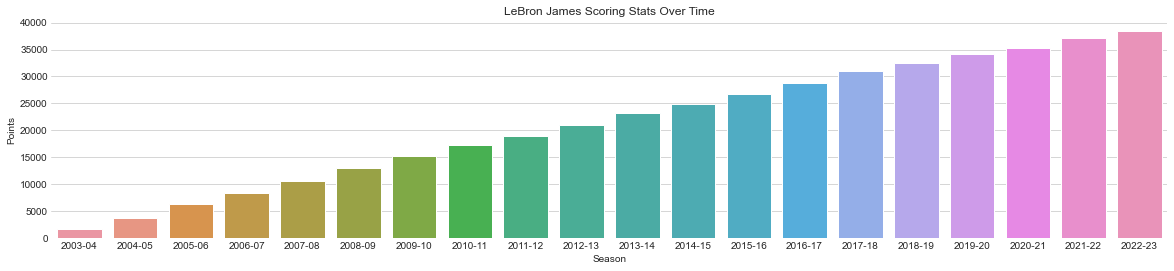

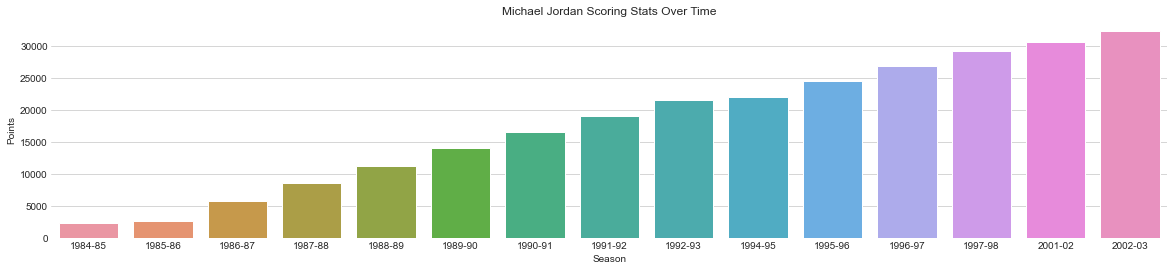

In [54]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,4))
c = sns.barplot(data = lebronCareer, x='SEASON_ID',y='SUM_PTS')
plt.xlabel('Season')
plt.ylabel('Points')
plt.title('LeBron James Scoring Stats Over Time')
plt.show(c)

sns.set_style("whitegrid")
plt.figure(figsize=(20,4))
c = sns.barplot(data = mjcareer, x='SEASON_ID',y='SUM_PTS')
plt.xlabel('Season')
plt.ylabel('Points')
plt.title('Michael Jordan Scoring Stats Over Time')
plt.show(c)

In [55]:
lebronCareer_teams = lebronCareer.groupby('TEAM_ABBREVIATION')[['SUM_PTS']].sum()
lebronCareer_teams['TEAM'] = lebronCareer_teams.index
lebronCareer_teams = lebronCareer_teams.sort_values(['SUM_PTS'], ascending=True)

In [56]:
mjcareer_teams = mjcareer.groupby('TEAM_ABBREVIATION')[['SUM_PTS']].sum()
mjcareer_teams['TEAM'] = mjcareer_teams.index
mjcareer_teams = mjcareer_teams.sort_values(['SUM_PTS'], ascending=True)

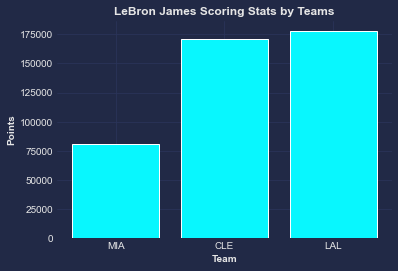

In [57]:

plt.style.use("cyberpunk")
x = lebronCareer_teams['TEAM']
y = lebronCareer_teams['SUM_PTS']
plt.bar(x,y)
plt.xlabel('Team', fontweight="bold")
plt.ylabel('Points', fontweight="bold")
plt.title('LeBron James Scoring Stats by Teams', fontweight="bold")
plt.show()

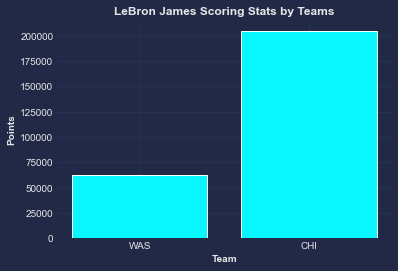

In [58]:
plt.style.use("cyberpunk")
x = mjcareer_teams['TEAM']
y = mjcareer_teams['SUM_PTS']
plt.bar(x,y)
plt.xlabel('Team', fontweight="bold")
plt.ylabel('Points', fontweight="bold")
plt.title('LeBron James Scoring Stats by Teams', fontweight="bold")
plt.show()

In [67]:
lebron_stats = lebronCareer.drop(columns=['TEAM_ID','LEAGUE_ID','PLAYER_ID','GS'])
lebron_stats

,SEASON_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,SUM_PTS
0,2003-04,CLE,19.0,79,3120.0,622,1492,0.417,63,217,0.290,347,460,0.754,99,333,432,465,130,58,273,149,1654,1654
1,2004-05,CLE,20.0,80,3388.0,795,1684,0.472,108,308,0.351,477,636,0.750,111,477,588,577,177,52,262,146,2175,3829
2,2005-06,CLE,21.0,79,3361.0,875,1823,0.480,127,379,0.335,601,814,0.738,75,481,556,521,123,66,260,181,2478,6307
3,2006-07,CLE,22.0,78,3190.0,772,1621,0.476,99,310,0.319,489,701,0.698,83,443,526,470,125,55,250,171,2132,8439
4,2007-08,CLE,23.0,75,3027.0,794,1642,0.484,113,359,0.315,549,771,0.712,133,459,592,539,138,81,255,165,2250,10689
5,2008-09,CLE,24.0,81,3054.0,789,1613,0.489,132,384,0.344,594,762,0.780,106,507,613,587,137,93,241,139,2304,12993
6,2009-10,CLE,25.0,76,2966.0,768,1528,0.503,129,387,0.333,593,773,0.767,71,483,554,651,125,77,261,119,2258,15251
7,2010-11,MIA,26.0,79,3063.0,758,1485,0.510,92,279,0.330,503,663,0.759,80,510,590,554,124,50,284,163,2111,17362
8,2011-12,MIA,27.0,62,2326.0,621,1169,0.531,54,149,0.362,387,502,0.771,94,398,492,387,115,50,213,96,1683,19045
9,2012-13,MIA,28.0,76,2877.0,765,1354,0.565,103,254,0.406,403,535,0.753,97,513,610,551,129,67,226,110,2036,21081
